In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import datetime
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

In [2]:
IMAGE_FOLDER = './data/'
CSV_FILENAME = "experiment_data.csv"
PLOT_DATA = True
SAVE_TO_CSV = True
SELECT_RANGE = False
START = 100
END = 200

#figure setting
linewidth = 3

In [3]:
def data_processing(image_folder):
    dic = {"time_405":[],"time_470":[],"intensity_405":[],"intensity_470":[]}
    i = 0
    for file in os.listdir(image_folder):
        if file.endswith(".jpg"):
            date_string = file[4:-4]
            format_string = "%y-%m-%d_%H-%M-%S-%f"
            datetime_obj = datetime.datetime.strptime(date_string, format_string)
            img = cv2.imread(os.path.join(image_folder, file))
            intensity = np.sum(img)
            if i % 3 == 0:
                dic["time_405"].append(datetime_obj)
                dic["intensity_405"].append(intensity)
            elif i % 3 == 1:
                dic["time_470"].append(datetime_obj)
                dic["intensity_470"].append(intensity)
            i+=1
    dic_len = min(len(dic['time_405']),len(dic['time_470']))
    dic['time_405'] = dic['time_405'][:dic_len]
    dic['intensity_405'] = dic['intensity_405'][:dic_len]
    df=pd.DataFrame(dic).astype({'intensity_405': 'float','intensity_470': 'float'})
    if SELECT_RANGE:
        df = df.iloc[START:END,:]
    df["calibrated_470"] = df["intensity_470"]-df["intensity_405"]
    df["normalized_470"] = zscore(df["calibrated_470"])
    std = df.std()
    std_df = pd.DataFrame(std[["intensity_405","intensity_470","calibrated_470", "normalized_470"]]).T.rename(index={0: 'standard deviation'})
    df_std = pd.concat([df, std_df])
    display(pd.concat([df_std.iloc[80:90,:], df_std.tail(1)]))
    return df

def signal_plot(df):
    fig, ax = plt.subplots(figsize=(25,4))
    sns.lineplot(x='time_405', y='intensity_405', data=df, ax=ax, label='raw_405', linewidth = linewidth)
    sns.lineplot(x='time_470', y='intensity_470', data=df, ax=ax, label='raw_470', linewidth = linewidth)
    sns.lineplot(x='time_470', y='calibrated_470', data=df, ax=ax, label='calibrated_470', linewidth = linewidth)
    # sns.lineplot(x='time_470', y='normalized_470', data=df, ax=ax, label='470')
    ax.set_title('Fluorescence of LED')
    ax.set_xlabel('Time')
    ax.set_ylabel('intensity')
    ax.legend()

    plt.show()

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-19 18:33:41.138095,2023-04-19 18:33:41.204501,1662996.0,3879249.0,2216253.0,0.137047
81,2023-04-19 18:33:41.337311,2023-04-19 18:33:41.404693,1661172.0,3888378.0,2227206.0,0.157585
82,2023-04-19 18:33:41.539460,2023-04-19 18:33:41.604888,1665366.0,3888690.0,2223324.0,0.150306
83,2023-04-19 18:33:41.737698,2023-04-19 18:33:41.804102,1660875.0,3889386.0,2228511.0,0.160032
84,2023-04-19 18:33:41.937892,2023-04-19 18:33:42.004296,1658751.0,3890346.0,2231595.0,0.165815
85,2023-04-19 18:33:42.138085,2023-04-19 18:33:42.244530,1666851.0,3855744.0,2188893.0,0.085743
86,2023-04-19 18:33:42.338278,2023-04-19 18:33:42.404684,1563597.0,2174868.0,611271.0,-2.872539
87,2023-04-19 18:33:42.538472,2023-04-19 18:33:42.605855,1568229.0,2182734.0,614505.0,-2.866475
88,2023-04-19 18:33:42.738667,2023-04-19 18:33:42.805070,1572927.0,2182026.0,609099.0,-2.876612
89,2023-04-19 18:33:42.938857,2023-04-19 18:33:43.005263,1570368.0,2180484.0,610116.0,-2.874705


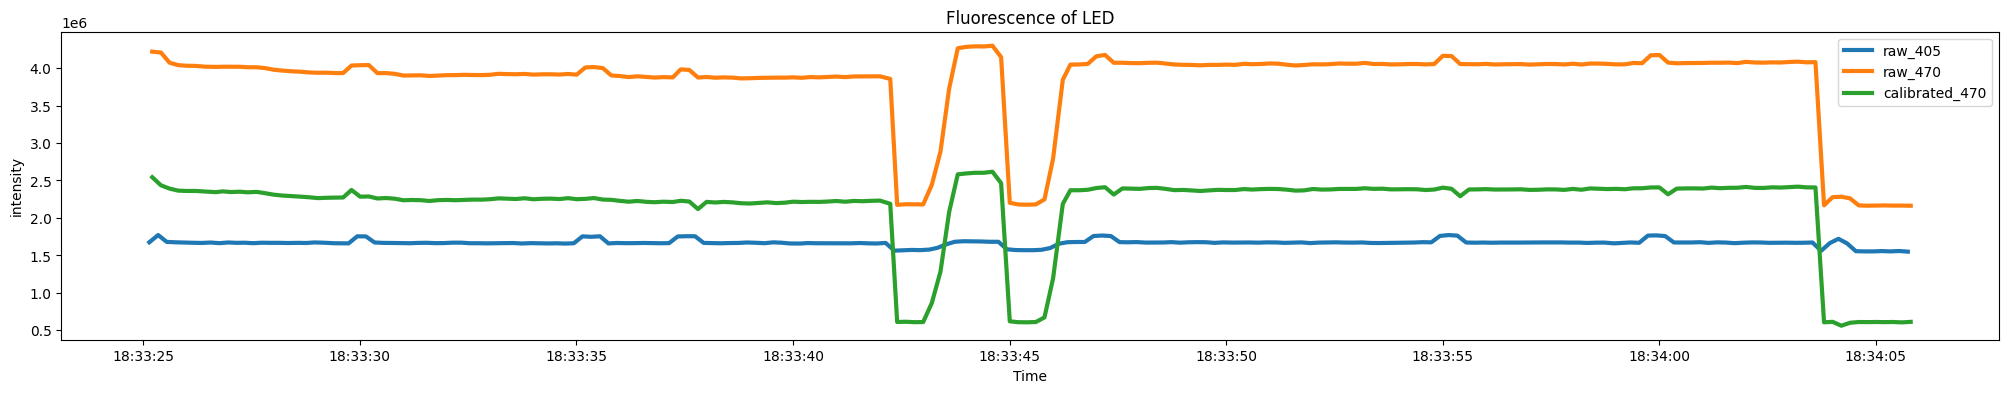

In [4]:
df = data_processing(IMAGE_FOLDER+"test1")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 15:56:41.726673,2023-04-26 15:56:41.794055,2121414.0,3733368.0,1611954.0,0.055939
81,2023-04-26 15:56:41.926861,2023-04-26 15:56:41.993267,2118507.0,3734358.0,1615851.0,0.157353
82,2023-04-26 15:56:42.127055,2023-04-26 15:56:42.193462,2040306.0,3655209.0,1614903.0,0.132683
83,2023-04-26 15:56:42.328231,2023-04-26 15:56:42.394630,2041554.0,3657432.0,1615878.0,0.158056
84,2023-04-26 15:56:42.526464,2023-04-26 15:56:42.593847,2038077.0,3650601.0,1612524.0,0.070773
85,2023-04-26 15:56:42.727634,2023-04-26 15:56:42.793062,2039211.0,3655188.0,1615977.0,0.160632
86,2023-04-26 15:56:42.927827,2023-04-26 15:56:42.996187,2041389.0,3657378.0,1615989.0,0.160945
87,2023-04-26 15:56:43.128020,2023-04-26 15:56:43.193449,2039583.0,3657156.0,1617573.0,0.202166
88,2023-04-26 15:56:43.326258,2023-04-26 15:56:43.393640,2041206.0,3668001.0,1626795.0,0.442156
89,2023-04-26 15:56:43.527429,2023-04-26 15:56:43.595790,2041797.0,3658056.0,1616259.0,0.167971


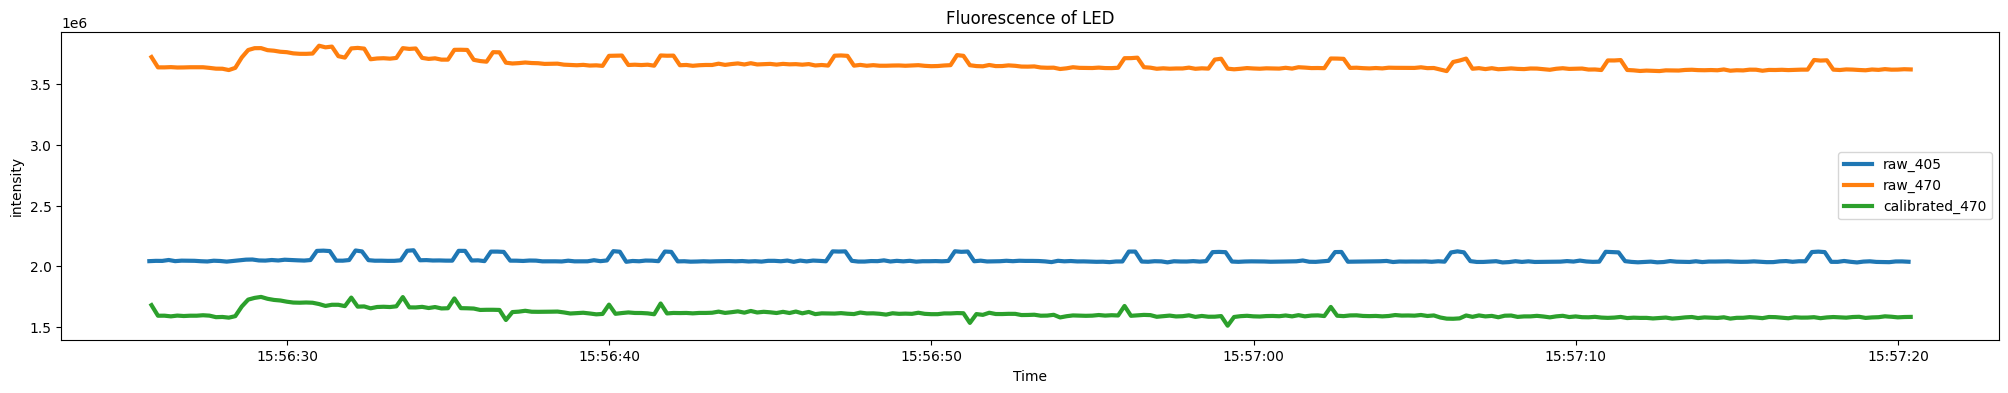

In [5]:
df = data_processing(IMAGE_FOLDER+"test2")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:07:21.887773,2023-04-26 16:07:21.954179,1313136.0,3040284.0,1727148.0,0.585801
81,2023-04-26 16:07:22.089922,2023-04-26 16:07:22.155349,1312272.0,3040125.0,1727853.0,0.597493
82,2023-04-26 16:07:22.289137,2023-04-26 16:07:22.354563,1310760.0,3047694.0,1736934.0,0.748096
83,2023-04-26 16:07:22.488351,2023-04-26 16:07:22.553779,1307946.0,3048390.0,1740444.0,0.806308
84,2023-04-26 16:07:22.689521,2023-04-26 16:07:22.756902,1307190.0,3046545.0,1739355.0,0.788247
85,2023-04-26 16:07:22.893623,2023-04-26 16:07:22.956120,1308591.0,3052326.0,1743735.0,0.860887
86,2023-04-26 16:07:23.087952,2023-04-26 16:07:23.154360,1312356.0,3050478.0,1738122.0,0.767799
87,2023-04-26 16:07:23.288149,2023-04-26 16:07:23.355529,1309464.0,3056451.0,1746987.0,0.914819
88,2023-04-26 16:07:23.488345,2023-04-26 16:07:23.554744,1311588.0,3055032.0,1743444.0,0.856061
89,2023-04-26 16:07:23.687556,2023-04-26 16:07:23.754939,1313961.0,3053616.0,1739655.0,0.793223


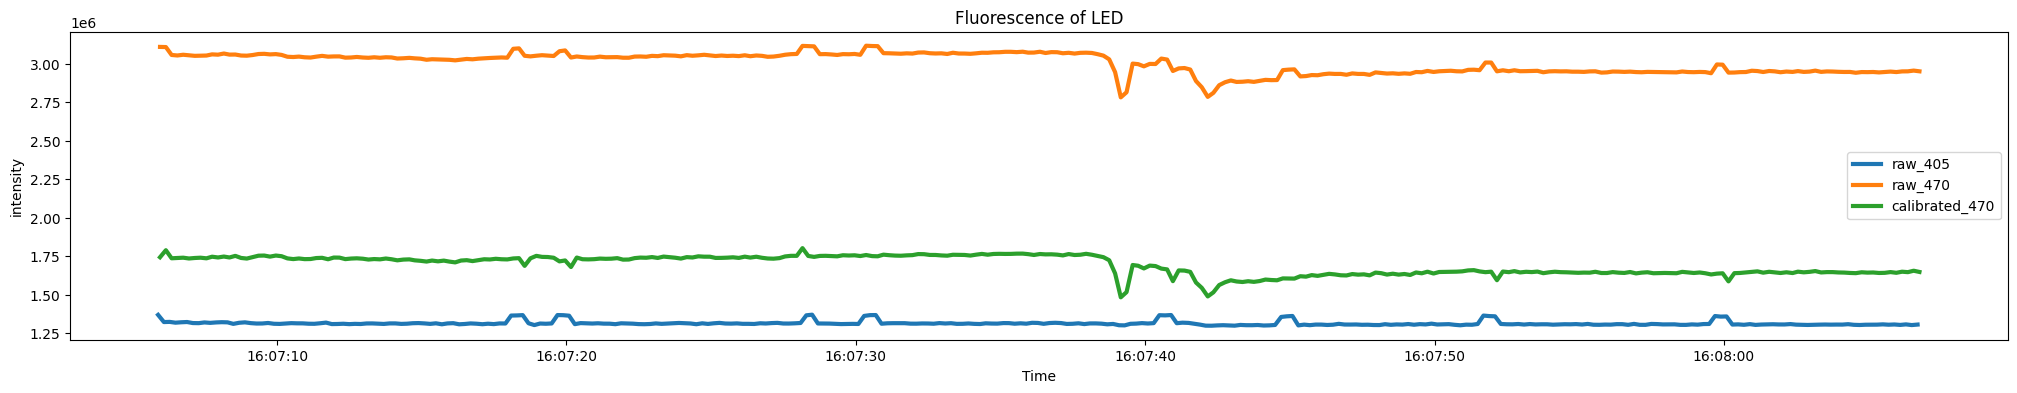

In [6]:
df = data_processing(IMAGE_FOLDER+"test3")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:11:51.311207,2023-04-26 16:11:51.377612,1037574.0,2155752.0,1118178.0,-1.310957
81,2023-04-26 16:11:51.514332,2023-04-26 16:11:51.578784,1040622.0,2188098.0,1147476.0,-1.143713
82,2023-04-26 16:11:51.711593,2023-04-26 16:11:51.784836,1041969.0,2188803.0,1146834.0,-1.147377
83,2023-04-26 16:11:51.910809,2023-04-26 16:11:51.978191,1038201.0,2195109.0,1156908.0,-1.089871
84,2023-04-26 16:11:52.111003,2023-04-26 16:11:52.178385,1041519.0,2208672.0,1167153.0,-1.031388
85,2023-04-26 16:11:52.312173,2023-04-26 16:11:52.385413,1044948.0,2218503.0,1173555.0,-0.994843
86,2023-04-26 16:11:52.512366,2023-04-26 16:11:52.577795,1045392.0,2218701.0,1173309.0,-0.996248
87,2023-04-26 16:11:52.710605,2023-04-26 16:11:52.777010,1042362.0,2235720.0,1193358.0,-0.8818
88,2023-04-26 16:11:52.911777,2023-04-26 16:11:52.983064,1043346.0,2243151.0,1199805.0,-0.844998
89,2023-04-26 16:11:53.118802,2023-04-26 16:11:53.179350,1043427.0,2246385.0,1202958.0,-0.826999


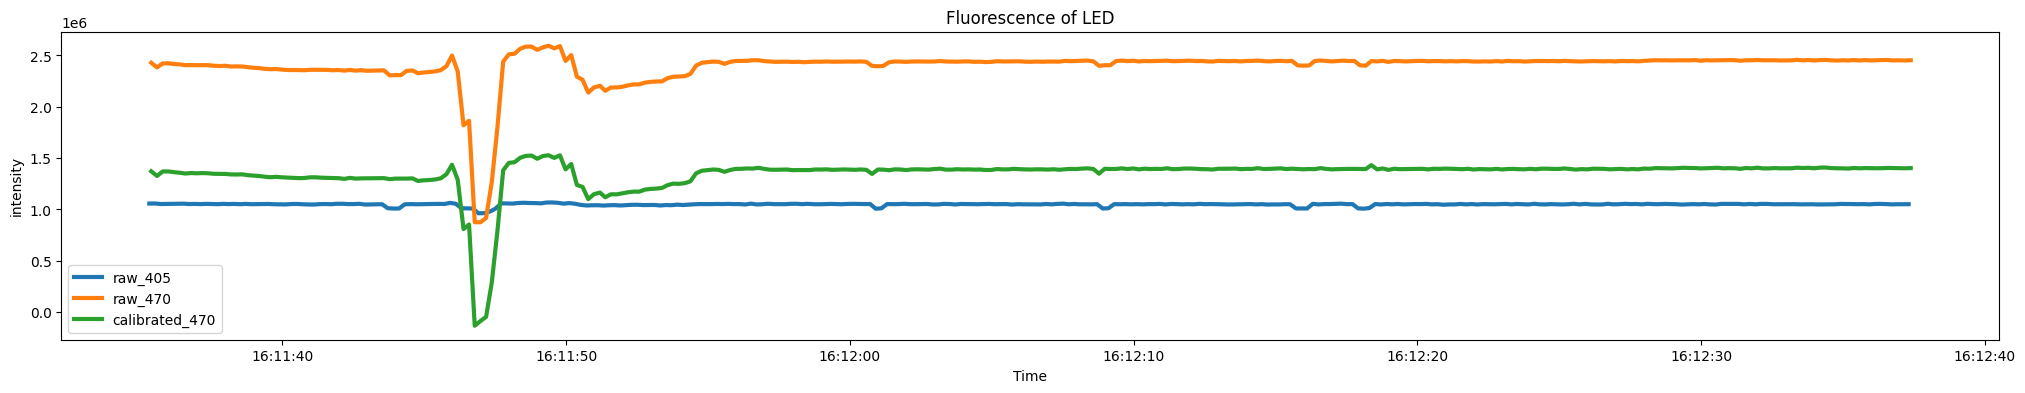

In [7]:
df = data_processing(IMAGE_FOLDER+"test4")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:31:48.879144,2023-04-26 16:31:48.943596,1517430.0,2980245.0,1462815.0,0.4275
81,2023-04-26 16:31:49.077385,2023-04-26 16:31:49.143789,1515639.0,2973081.0,1457442.0,0.336425
82,2023-04-26 16:31:49.277576,2023-04-26 16:31:49.343981,1517481.0,2970093.0,1452612.0,0.254555
83,2023-04-26 16:31:49.476792,2023-04-26 16:31:49.543195,1519812.0,2969976.0,1450164.0,0.21306
84,2023-04-26 16:31:49.677960,2023-04-26 16:31:49.748273,1520394.0,2963412.0,1443018.0,0.091932
85,2023-04-26 16:31:49.877176,2023-04-26 16:31:49.943582,1519341.0,2965164.0,1445823.0,0.139478
86,2023-04-26 16:31:50.077372,2023-04-26 16:31:50.144751,1520580.0,2969964.0,1449384.0,0.199838
87,2023-04-26 16:31:50.276586,2023-04-26 16:31:50.344945,1517355.0,2965053.0,1447698.0,0.17126
88,2023-04-26 16:31:50.477267,2023-04-26 16:31:50.544650,1518948.0,2961765.0,1442817.0,0.088525
89,2023-04-26 16:31:50.677459,2023-04-26 16:31:50.743864,1513134.0,2965164.0,1452030.0,0.244689


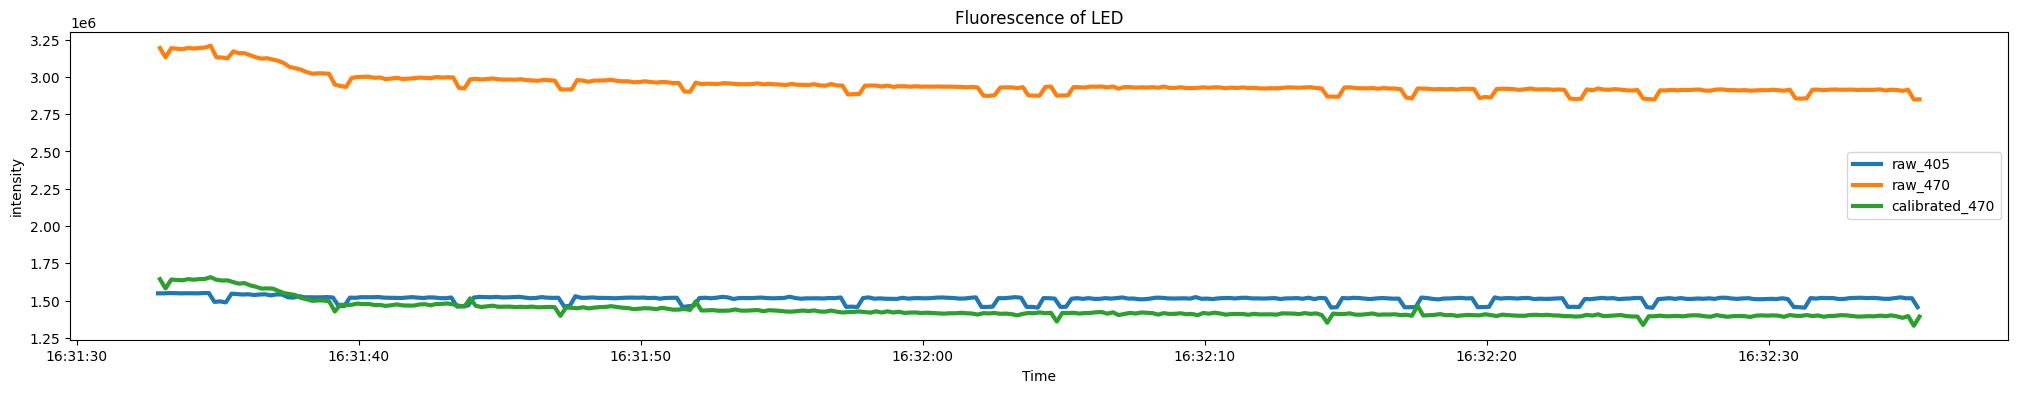

In [8]:
df = data_processing(IMAGE_FOLDER+"test9")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:16:21.413889,2023-04-26 16:16:21.479318,1300830.0,2987727.0,1686897.0,0.809253
81,2023-04-26 16:16:21.614081,2023-04-26 16:16:21.682439,1295370.0,2987646.0,1692276.0,0.818069
82,2023-04-26 16:16:21.813297,2023-04-26 16:16:21.880679,1294659.0,2983899.0,1689240.0,0.813093
83,2023-04-26 16:16:22.013488,2023-04-26 16:16:22.079894,1294680.0,2774166.0,1479486.0,0.469306
84,2023-04-26 16:16:22.217588,2023-04-26 16:16:22.288876,1204965.0,1319667.0,114702.0,-1.767581
85,2023-04-26 16:16:22.416804,2023-04-26 16:16:22.487118,1152810.0,1186647.0,33837.0,-1.900119
86,2023-04-26 16:16:22.612115,2023-04-26 16:16:22.679498,1150098.0,1187688.0,37590.0,-1.893968
87,2023-04-26 16:16:22.812307,2023-04-26 16:16:22.880667,1192245.0,2617728.0,1425483.0,0.380795
88,2023-04-26 16:16:23.035938,2023-04-26 16:16:23.082811,1294374.0,2915829.0,1621455.0,0.701993
89,2023-04-26 16:16:23.220506,2023-04-26 16:16:23.286910,1293693.0,2895945.0,1602252.0,0.67052


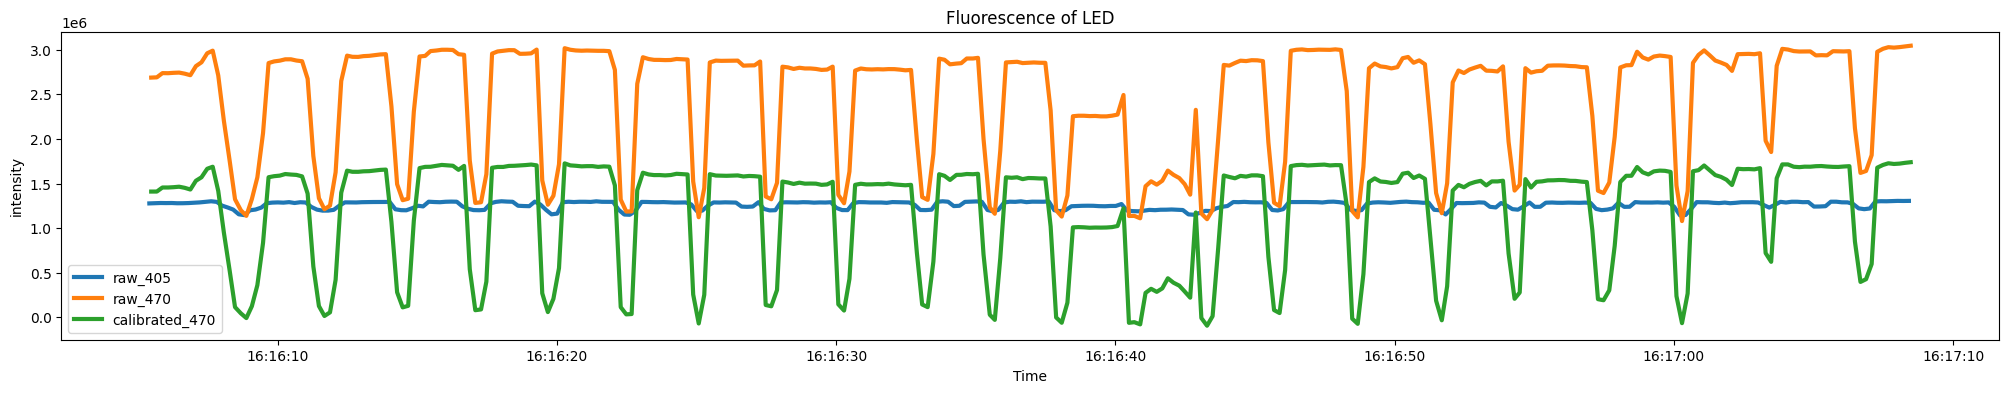

In [9]:
df = data_processing(IMAGE_FOLDER+"test5_discreated")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:20:45.878414,2023-04-26 16:20:45.944818,1195029.0,1094520.0,-100509.0,-1.185509
81,2023-04-26 16:20:46.078608,2023-04-26 16:20:46.145013,1190814.0,1088724.0,-102090.0,-1.187452
82,2023-04-26 16:20:46.281730,2023-04-26 16:20:46.354972,1244148.0,1137159.0,-106989.0,-1.193472
83,2023-04-26 16:20:46.492666,2023-04-26 16:20:46.555165,1243656.0,1134711.0,-108945.0,-1.195876
84,2023-04-26 16:20:46.678209,2023-04-26 16:20:46.746568,1240455.0,1138212.0,-102243.0,-1.18764
85,2023-04-26 16:20:46.878403,2023-04-26 16:20:46.947741,1240956.0,1140096.0,-100860.0,-1.18594
86,2023-04-26 16:20:47.080550,2023-04-26 16:20:47.145977,1245429.0,1150074.0,-95355.0,-1.179176
87,2023-04-26 16:20:47.279764,2023-04-26 16:20:47.345195,1243098.0,1095192.0,-147906.0,-1.243753
88,2023-04-26 16:20:47.478003,2023-04-26 16:20:47.547341,1196994.0,1099152.0,-97842.0,-1.182232
89,2023-04-26 16:20:47.693824,2023-04-26 16:20:47.745579,1200969.0,1097712.0,-103257.0,-1.188886


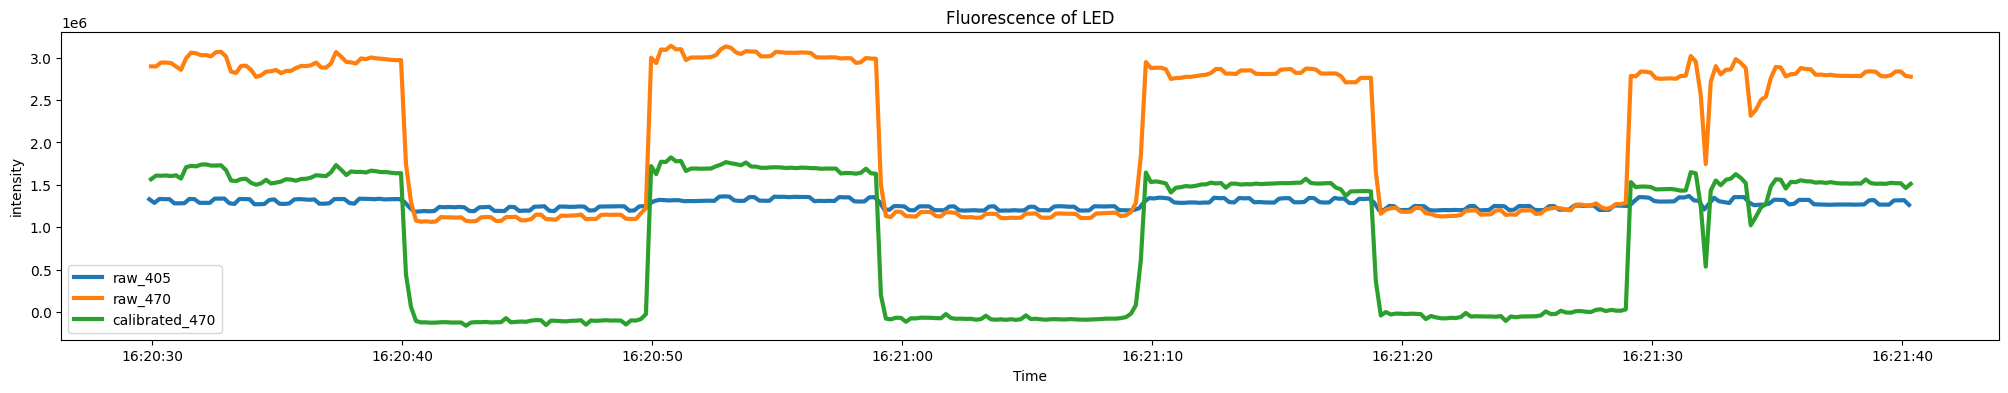

In [10]:
df = data_processing(IMAGE_FOLDER+"test6_discreated")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:24:28.576850,2023-04-26 16:24:28.642278,1143312.0,2689578.0,1546266.0,0.570744
81,2023-04-26 16:24:28.776066,2023-04-26 16:24:28.845401,1145694.0,2711979.0,1566285.0,0.602657
82,2023-04-26 16:24:28.980164,2023-04-26 16:24:29.042665,1190367.0,2785869.0,1595502.0,0.649234
83,2023-04-26 16:24:29.176452,2023-04-26 16:24:29.242856,1191762.0,2787399.0,1595637.0,0.649449
84,2023-04-26 16:24:29.376646,2023-04-26 16:24:29.442071,1184205.0,2183397.0,999192.0,-0.301372
85,2023-04-26 16:24:29.575860,2023-04-26 16:24:29.647149,1052118.0,1074801.0,22683.0,-1.85807
86,2023-04-26 16:24:29.778982,2023-04-26 16:24:29.843435,1052658.0,1304343.0,251685.0,-1.493007
87,2023-04-26 16:24:29.977224,2023-04-26 16:24:30.042657,1125204.0,2574240.0,1449036.0,0.415745
88,2023-04-26 16:24:30.175459,2023-04-26 16:24:30.243819,1126452.0,2542371.0,1415919.0,0.362952
89,2023-04-26 16:24:30.375656,2023-04-26 16:24:30.443036,1124121.0,2509332.0,1385211.0,0.313999


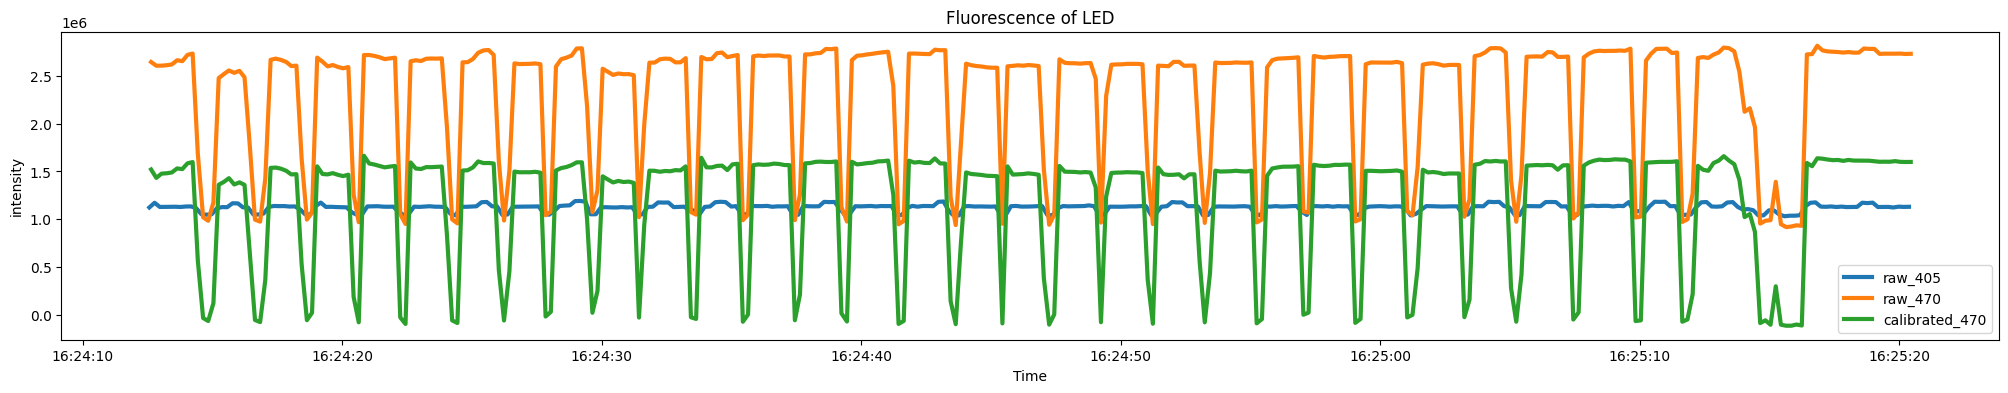

In [11]:
df = data_processing(IMAGE_FOLDER+"test7_discreated")
signal_plot(df)

,time_405,time_470,intensity_405,intensity_470,calibrated_470,normalized_470
80,2023-04-26 16:27:56.498154,2023-04-26 16:27:56.577255,1147587.0,2392173.0,1244586.0,0.114836
81,2023-04-26 16:27:56.700302,2023-04-26 16:27:56.766707,1145973.0,1822308.0,676335.0,-0.739668
82,2023-04-26 16:27:56.898542,2023-04-26 16:27:56.964945,1122015.0,1083474.0,-38541.0,-1.814659
83,2023-04-26 16:27:57.098734,2023-04-26 16:27:57.165138,1119576.0,1045953.0,-73623.0,-1.867413
84,2023-04-26 16:27:57.299902,2023-04-26 16:27:57.375098,1116939.0,1088958.0,-27981.0,-1.798779
85,2023-04-26 16:27:57.519628,2023-04-26 16:27:57.565526,1092744.0,1758459.0,665715.0,-0.755638
86,2023-04-26 16:27:57.699316,2023-04-26 16:27:57.764742,1176447.0,2828223.0,1651776.0,0.727146
87,2023-04-26 16:27:57.898529,2023-04-26 16:27:57.965913,1180506.0,2898762.0,1718256.0,0.827115
88,2023-04-26 16:27:58.098721,2023-04-26 16:27:58.166104,1225539.0,2900031.0,1674492.0,0.761305
89,2023-04-26 16:27:58.297937,2023-04-26 16:27:58.364341,1229913.0,2902482.0,1672569.0,0.758413


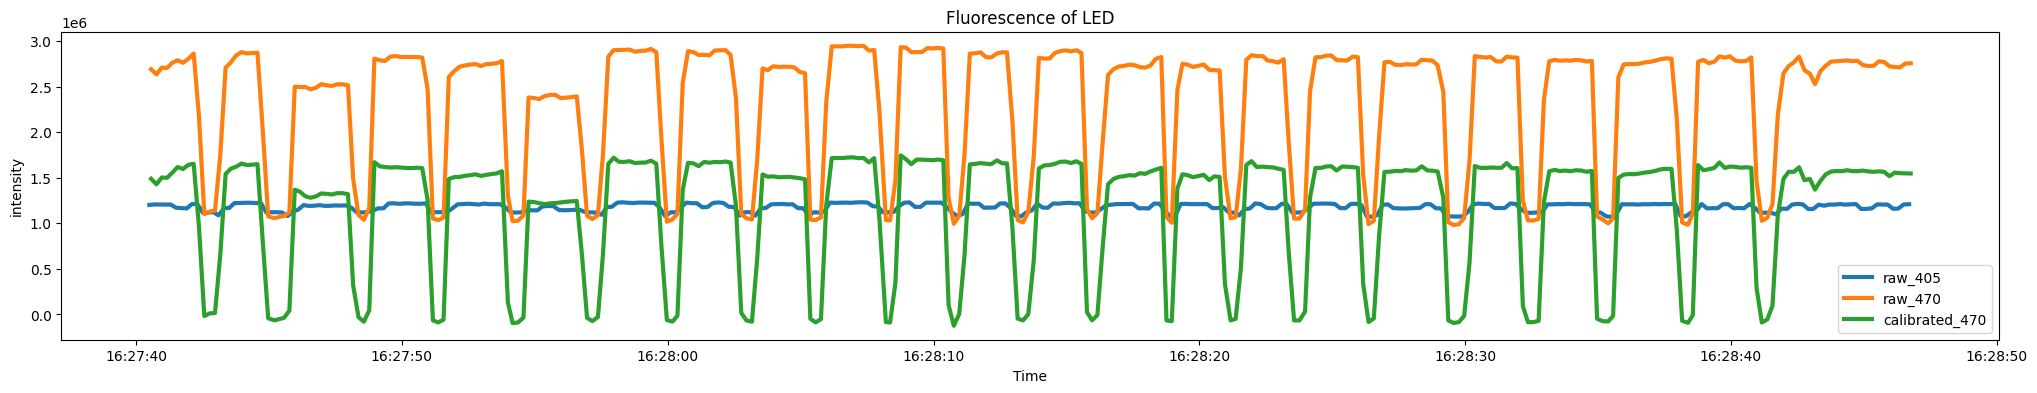

In [12]:
df = data_processing(IMAGE_FOLDER+"test8_discreated")
signal_plot(df)